## Uso y aplicación de los métodos de agrupamiento

Aprendizaje no supervisado

- Jaime Díaz González (coordinador)
- Jordi Tudela (secretario)
- Alvaro Navarro Guzmán (revisor)

In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.decomposition import PCA

#### DataSet 1: Lung Disease

The first 5 variables are all blood tests which are thought
to be sensitive to liver disorders that might arise from
excessive alcohol consumption.

https://archive.ics.uci.edu/ml/datasets/liver+disorders

In [2]:
nms=["Mean corpuscular volume", "alkaline phosphotase","alanine aminotransferase", "aspartate aminotransferase",
     "gamma-glutamyl transpeptidase","half-pint aquivalents per day", "split"]

lung=pd.read_table('DataSets/Liver_Disease.csv', sep=';', names =nms )

#Eliminamos la variable "etiqueta" de este dataset y de esta forma transformamos el set de datos en uno en el que 
#desconocemos el agrupamiento.
lung=lung.iloc[:,0:6]
lung.sample(5)

,Mean corpuscular volume,alkaline phosphotase,alanine aminotransferase,aspartate aminotransferase,gamma-glutamyl transpeptidase,half-pint aquivalents per day
224,90,64,12,17,14,0.5
151,92,82,27,24,37,6.0
283,83,70,17,19,23,4.0
84,92,60,30,27,297,2.0
216,91,84,11,12,10,0.5


#### DataSet 2: Zoo Animals

A simple database containing 17 Boolean-valued attributes.

https://archive.ics.uci.edu/ml/datasets/zoo

In [3]:
zoo=pd.read_table('DataSets/Zoo_DataSet.csv', sep=';' , 
                  names = ["animal name", "hair", "feathers", "eggs","milk", "airborne", "aquatic", 
                           "predator", "toothed", "backbone", "breathes","venomous", "fins", "legs",
                           "tail", "domestic", "catsize", "type" ])

#Este será el set de datos del que conocemos el agrupamiento real
zoo.sample(5)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
14,crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
67,puma,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
59,pheasant,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#### 0. PREPROCESADO

In [5]:
# DataSet 1: Enfermedad del pulmón
####################################

# Eliminamos las filas en las que haya algún NaN
lung.dropna(inplace=True)
#Estandarizamos las columnas del dataset
standardizer = preprocessing.StandardScaler()
lung_std = standardizer.fit_transform(lung.astype('float64'))
# Aplicamos una PCA para poder representar en 2D los atributos sobre los que aplicar las medidas de clustering
pca = PCA()
PCs_lung = pca.fit_transform(lung_std)
principal_lung = pd.DataFrame(data = PCs_lung[:,:2], columns = ['PC 1', 'PC 2'])



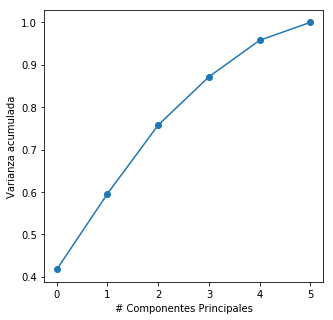

In [6]:
#Comprobamos la varianza acumulada por las PCs de la PCA
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('# Componentes Principales')
plt.ylabel('Varianza acumulada');
plt.show()

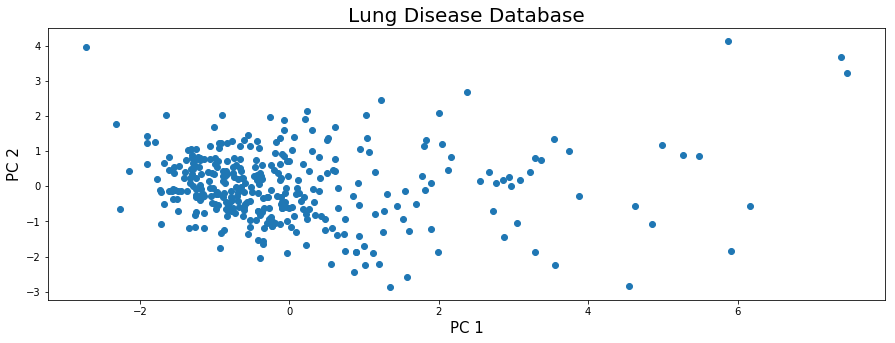

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(PCs_lung[:,0],PCs_lung[:,1])
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Lung Disease Database', fontsize = 20)
plt.show()

In [9]:
# DataSet 2: Animales del Zoo
#################################

# Separamos la primera y la última columna del dataframe
zoo_label=zoo.iloc[:,-1]
zoo=zoo.iloc[:,1:-1]


# Eliminamos las filas en las que haya algún NaN
zoo.dropna(inplace=True)
#Estandarizamos las columnas del dataset
standardizer = preprocessing.StandardScaler()
zoo_std = standardizer.fit_transform(zoo.astype('float64'))
# Aplicamos una PCA para poder representar en 2D los atributos sobre los que aplicar las medidas de clustering
pca = PCA()
PCs_zoo = pca.fit_transform(zoo_std)
principal_zoo = pd.DataFrame(data = PCs_zoo[:,:2], columns = ['PC 1', 'PC 2'])



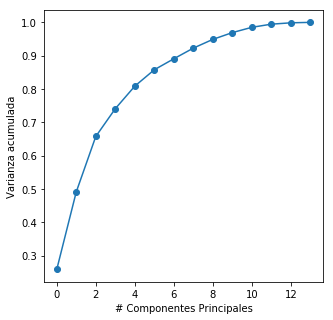

In [10]:
#Comprobamos la varianza acumulada por las PCs de la PCA
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('# Componentes Principales')
plt.ylabel('Varianza acumulada');
plt.show()

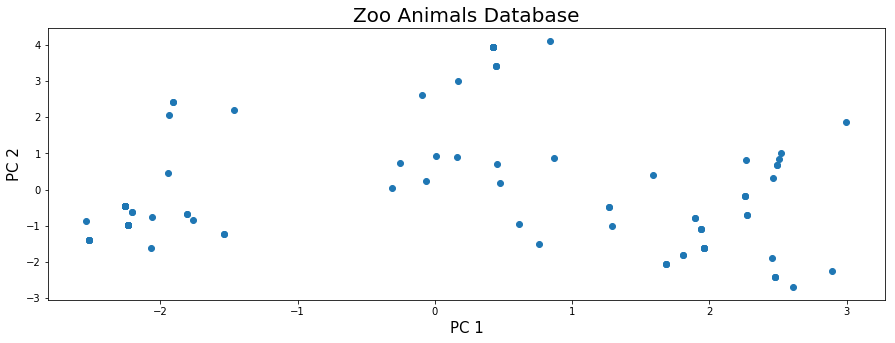

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(PCs_zoo[:,0],PCs_zoo[:,1])
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Zoo Animals Database', fontsize = 20)
plt.show()

#### 1. Evaluación extrínseca

In [12]:
def matriz_confusion(cat_real, cat_pred):
    cats = np.unique(cat_real)
    clusts = np.unique(cat_pred)
    mat = np.array([[np.sum(np.logical_and(cat_real==cats[i], cat_pred==clusts[j])) 
                     for j in np.arange(clusts.size)] 
                    for i in np.arange(cats.size)])
    return(mat)

def medida_precision(mat, l, k):
    return mat[l,k]/float(np.sum(mat[:,k]))

def medida_recall(mat, l, k):
    return mat[l,k]/float(np.sum(mat[l,:]))

def medida_f1_especifica(mat, l, k):
    prec = medida_precision(mat, l, k)
    rec = medida_recall(mat, l, k)
    if (prec+rec)==0:
        return 0
    if np.isnan(rec) or np.isnan(prec):
        return 0
    else:
        return 2*prec*rec/(prec+rec)

def medida_f1(mat):
    totales = np.sum(mat,1)/float(np.sum(mat))
    assign = np.sum([totales[l] * np.max([medida_f1_especifica(mat, l, k) 
                                          for k in np.arange(mat.shape[1])]) 
                     for l in np.arange(mat.shape[0])])
    return assign

def medida_pureza(mat):
    totales = np.sum(mat,0)/float(np.sum(mat))

    return np.sum([totales[k] * np.max(mat[:,k]/float(np.sum(mat[:,k]))) for k in np.arange(mat.shape[1])])

def medida_error(mat):
    assign = np.sum([np.max(mat[l,:]) for l in np.arange(mat.shape[0])])
    return 1 - assign / float(np.sum(mat))

def encontrar_mejor_clustering(resultados):
    return np.argmax(resultados)

#### 2, Evaluación intrínseca

#### 3. AGRUPAMIENTO POR PARTICIONES

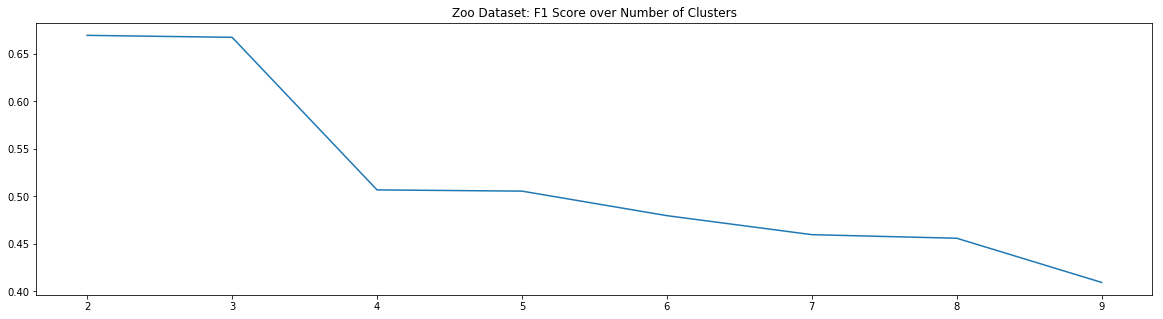

El mejor agrupamiento tiene 2 clusters:
-  Medida del error: 0.2178217821782178
-  Medida de pureza: 0.7821782178217822
-  Medida f1: 0.7806838795259671


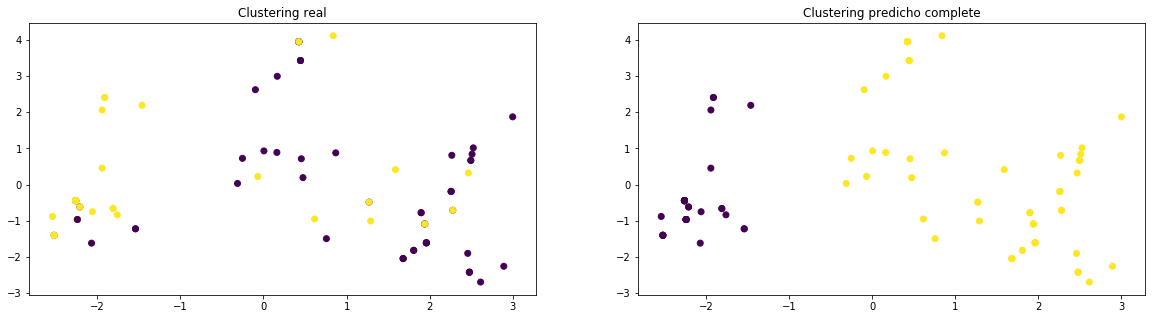

In [36]:
from sklearn.cluster import KMeans

# Explorar la bondad del agrupamiento en función al número de clusters
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

f1_scores = []
for n_clusters in range(MIN_CLUSTERS,MAX_CLUSTERS):
    clf = KMeans(n_clusters=n_clusters)
    y_pred = clf.fit_predict(PCs_zoo)
    confusion = matriz_confusion(zoo_label.values,y_pred)
    f1_scores.append( medida_f1(confusion) )

plt.figure(figsize=(20,5))
plt.plot(list(range(MIN_CLUSTERS,MAX_CLUSTERS)), clusters_score )
plt.title("Zoo Dataset: F1 Score over Number of Clusters")
plt.show()

# Aplicar el mejor resultado
best_n_clusters = np.argmax(clusters_score)
y_pred = KMeans(n_clusters=MIN_CLUSTERS + best_n_clusters).fit_predict(PCs_zoo)
confusion = matriz_confusion(zoo_label.values, y_pred)
print("El mejor agrupamiento tiene {} clusters:".format(MIN_CLUSTERS + best_n_clusters))
print("-  Medida del error:", medida_error(confusion.T))
print("-  Medida de pureza:", medida_pureza(confusion))
print("-  Medida f1:", medida_f1(confusion))

# Mostrar resultados
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Clustering real')
ax[0].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c=zoo_label)
ax[1].set_title('Clustering predicho ' + mejor_disimilitud)
ax[1].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c=y_pred)

#### 4. AGRUPAMIENTO JERÁRQUICO

El mejor k es = 5
La mejor medida de disimilitud es = complete

Medidas extrínsecas:
  El valor del error cometido es =  0.28712871287128716
  La pureza del agrupamiento =  0.712871287128713
  La medida F1 =  0.5825664919433119


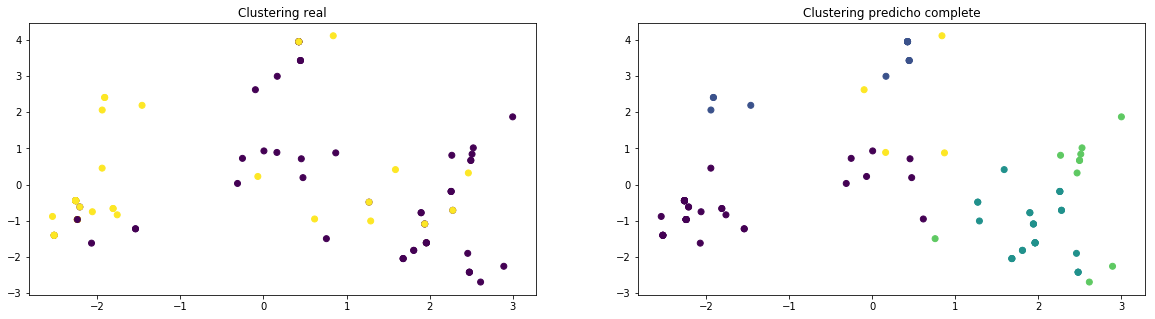

In [13]:
# Utilizamos la libreria scipy por ser la más completa en clustering jerárquico aglomerativo
from scipy.cluster.hierarchy import linkage, cut_tree

disimilitudes = {'single', 'complete', 'average'}

# El número de veces que vamos a probar distintos parámetros
total_pruebas = 7

# Lo necesito para saber cuál es la mejor disimilitud
disimilitudes_ejecutadas = []

calidades_clustering = []
for disimilitud in disimilitudes:
    
    for k in range(1, total_pruebas):
        clustering = linkage(PCs_zoo, disimilitud)

         # Calculamos la matriz de confusión
        mC = matriz_confusion(zoo_label, cut_tree(clustering, n_clusters=k).flatten())

        # Para calcular la calidad total del clustering, asignamos unos pesos a las distintas medidas.
        # Por ejemplo, nos parece más importante la medida del error que el de la pureza
        calidad_total = 0.5 * (1 - medida_error(mC.T)) +  0.2 * medida_pureza(mC) + 0.3 * medida_f1(mC)

        calidades_clustering.append(calidad_total)
        disimilitudes_ejecutadas.append(disimilitud)

# Recojo el índice del mejor clustering
indice_mejor = encontrar_mejor_clustering(calidades_clustering)

# Sumo 1 porque en el bucle anterior he empezado por un k = 1
mejor_k = encontrar_mejor_clustering(calidades_clustering)%(total_pruebas-1) + 1

mejor_disimilitud = disimilitudes_ejecutadas[indice_mejor]

print("El mejor k es = " + str(mejor_k))
print("La mejor medida de disimilitud es = " + mejor_disimilitud)

clustering = linkage(PCs_zoo, mejor_disimilitud)

# Calculamos la matriz de confusión
mC = matriz_confusion(zoo_label, cut_tree(clustering, n_clusters=mejor_k).flatten())

print('\nMedidas extrínsecas:')
print('  El valor del error cometido es = ', medida_error(mC.T))
print('  La pureza del agrupamiento = ', medida_pureza(mC))
print('  La medida F1 = ', medida_f1(mC))

# Mostrar resultados
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Clustering real')
ax[0].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c = zoo_label)
ax[1].set_title('Clustering predicho ' + mejor_disimilitud)
ax[1].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c=cut_tree(clustering, n_clusters=mejor_k).flatten())

#### 5. AGRUPAMIENTO ESPECTRAL

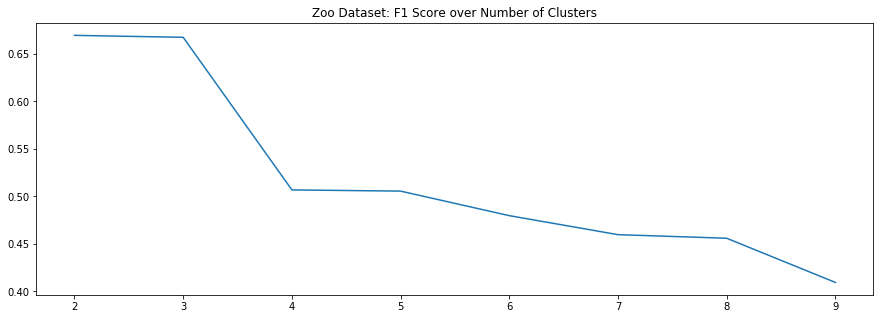

El mejor agrupamiento tiene 2 clusters:
-  Medida del error: 0.4158415841584159
-  Medida de pureza: 0.5841584158415841
-  Medida f1: 0.6209053086159678


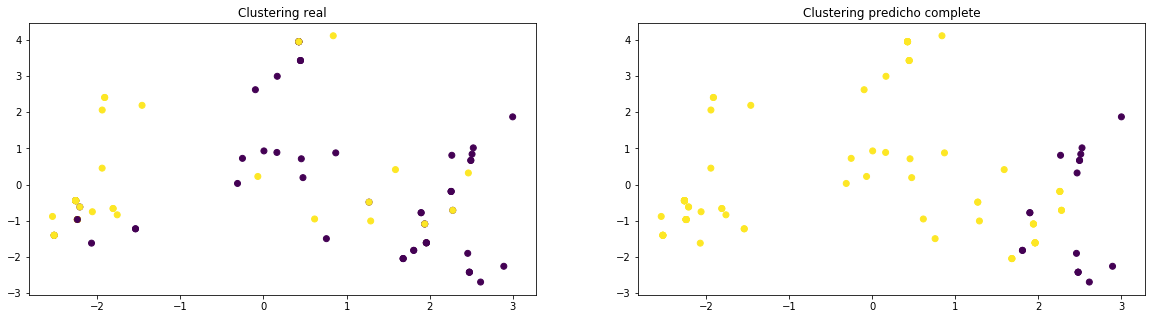

In [35]:
#datos Lung: PCs_lung
#datos Zoo: PCs_zoo, zoo_label

from sklearn.cluster import SpectralClustering

# Explorar la bondad del agrupamiento en función al número de clusters
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

f1_scores = []
for n_clusters in range(MIN_CLUSTERS,MAX_CLUSTERS):
    clf = SpectralClustering(n_clusters=n_clusters)
    y_pred = clf.fit_predict(PCs_zoo)
    confusion = matriz_confusion(zoo_label.values,y_pred)
    f1_scores.append( medida_f1(confusion) )

plt.figure(figsize=(20,5))
plt.plot(list(range(MIN_CLUSTERS,MAX_CLUSTERS)), clusters_score )
plt.title("Zoo Dataset: F1 Score over Number of Clusters")
plt.show()

# Aplicar el mejor resultado
best_n_clusters = np.argmax(clusters_score)
y_pred = SpectralClustering(n_clusters=MIN_CLUSTERS + best_n_clusters).fit_predict(PCs_zoo)
confusion = matriz_confusion(zoo_label.values, y_pred)
print("El mejor agrupamiento tiene {} clusters:".format(MIN_CLUSTERS + best_n_clusters))
print("-  Medida del error:", medida_error(confusion.T))
print("-  Medida de pureza:", medida_pureza(confusion))
print("-  Medida f1:", medida_f1(confusion))

# Mostrar resultados
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Clustering real')
ax[0].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c=zoo_label)
ax[1].set_title('Clustering predicho ' + mejor_disimilitud)
ax[1].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c=y_pred)

#### 6. AGRUPAMIENTO POR DENSIDAD

El mejor h es = 3

Medidas extrínsecas:
  El valor del error cometido es =  0.04950495049504955
  La pureza del agrupamiento =  0.9504950495049506
  La medida F1 =  0.8911357289575111


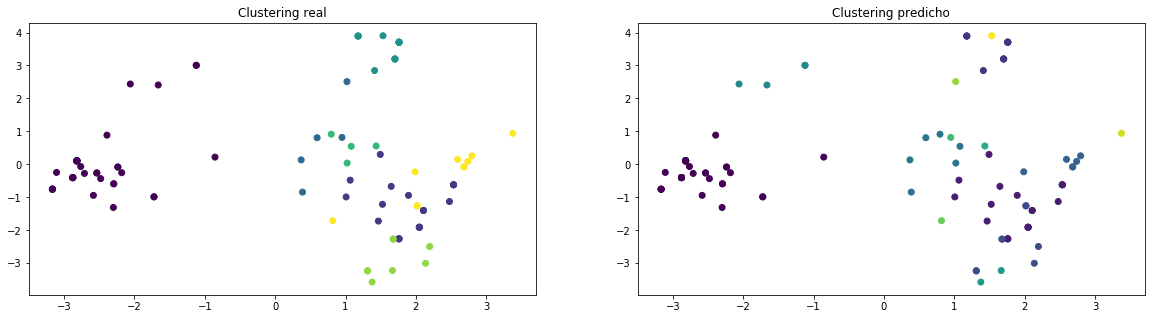

In [158]:
# Vamos a utilizar el método de desplazamiento de media
from sklearn.cluster import MeanShift

# El número de veces que vamos a probar distintos parámetros
total_pruebas = 10

calidades_clustering = []
for h in range(1, total_pruebas):
    clustering = MeanShift(bandwidth = h).fit(PCs_zoo)
    
    # Necesito sumar 1 porque el etiquetado predicho empieza incorrectamente por 0
    clustering.labels_  = clustering.labels_ + 1
    
    # Calculamos la matriz de confusión
    mC = matriz_confusion(zoo_label, clustering.labels_)
    
    # Para calcular la calidad total del clustering, asignamos unos pesos a las distintas medidas.
    # Por ejemplo, nos parece más importante la medida del error que el de la pureza
    calidad_total = 0.5 * (1 - medida_error(mC.T)) +  0.2 * medida_pureza(mC) + 0.3 * medida_f1(mC)
    
    calidades_clustering.append(calidad_total)

# Sumo 1 porque en el bucle anterior he empezado por un h = 1
mejor_h = encontrar_mejor_clustering(calidades_clustering) + 1

print("El mejor h es = " + str(mejor_h))

clustering = MeanShift(bandwidth = mejor_h).fit(PCs_zoo)
    
# Necesito sumar 1 porque el etiquetado predicho empieza incorrectamente por 0
clustering.labels_  = clustering.labels_ + 1
    
# Mostrar resultados
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Clustering real')
ax[0].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c = zoo_label)
ax[1].set_title('Clustering predicho')
ax[1].scatter(PCs_zoo[:,0], PCs_zoo[:,1], c = clustering.labels_)

# Calculamos la matriz de confusión
mC = matriz_confusion(zoo_label, clustering.labels_)


print('\nMedidas extrínsecas:')
print('  El valor del error cometido es = ', medida_error(mC.T))
print('  La pureza del agrupamiento = ', medida_pureza(mC))
print('  La medida F1 = ', medida_f1(mC))

#### 7. AGRUPAMIENTO PROBABILÍSTICO